In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2025-06-09 15:24:06.911258: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset
License(s): other
 96%|███████████████████████████████████████▍ | 722M/750M [00:03<00:00, 270MB/s]
100%|█████████████████████████████████████████| 750M/750M [00:04<00:00, 194MB/s]


In [4]:
import zipfile

with zipfile.ZipFile("stanford-dogs-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("data/stanford-dogs")

In [5]:
import os
os.listdir("data/stanford-dogs")

['images', 'annotations']

In [6]:
def count_images(directory, extensions={".jpg", ".jpeg", ".png"}):
    count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in extensions):
                count += 1
    return count

image_dir = "data/stanford-dogs/" 
total_images = count_images(image_dir)

print(f"Total images: {total_images}")

Total images: 20580


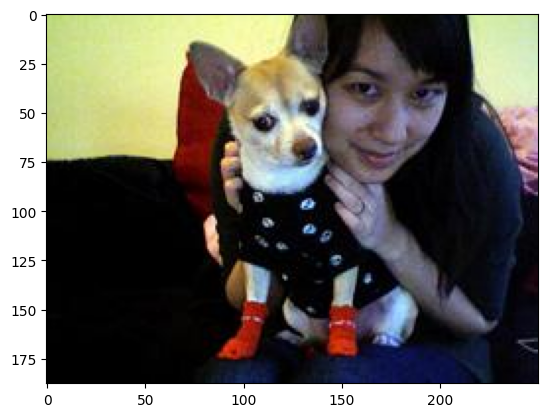

In [11]:
from PIL import Image

image_path = "data/stanford-dogs/images/Images/n02085620-Chihuahua/n02085620_7.jpg" 

img = Image.open(image_path)

# Show it using matplotlib
plt.imshow(img)

In [15]:
dataset_dir = "data/stanford-dogs/images/Images"
batch_size = 32
img_height = 224
img_width = 224
validation_split = 0.2
seed = 123

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)


['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [17]:
all_labels = []

for images, labels in train_ds.unbatch():
    all_labels.append(labels.numpy())

all_labels = np.array(all_labels)

counts = np.bincount(all_labels)

majority_class_index = counts.argmax()

print(f"Majority class index: {majority_class_index}")
print(f"Majority class name: {train_ds.class_names[majority_class_index]}")
print(f"Number of images in majority class: {counts[majority_class_index]}")

2025-06-09 16:07:20.739684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Majority class index: 2
Majority class name: n02085936-Maltese_dog
Number of images in majority class: 210


In [18]:
num_classes = len(train_ds.class_names)
majority_class_index = 2

class DummyMajorityModel(tf.keras.Model):
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        return tf.one_hot(tf.repeat(majority_class_index, batch_size), depth=num_classes)

dummy_model = DummyMajorityModel()
dummy_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [19]:
results = dummy_model.evaluate(val_ds)
print(f"Dummy model accuracy: {results[1]:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.0104 - loss: 15.9506
Dummy model accuracy: 0.01
